
# Linear Regression and Logistic Regression

# ABSTRACT:

### This analysis of the King County Data Set involves analyzing a data set having 21614 rows and 21 columns to perform the linear and logistic regression to find the various independent variables and their effect in determining the Price which is the dependent variable in the data set.
### We are constructing many models in the Linear Regression and Logistic Regression to find out the most significant model(consisting of the independent features directly affecting the dependent variable price of the data set)
### Certain Statistical concepts used are: correlation, R-Squared value,Root mean Squared Error, p-value, t-statistics and standard error to arrive at conclusion pertaining to the selection of the independent variables and inturn the train_test model.
### The following Techniques have been used to perform the analysis and arrive at the conclusions
### a)Exploratory Data Analysis
### b)Linear Regression
### c)Logistic Regression
### d)Multicollinearity test
### e)Step-wise regression
### f)Interaction effects between the highly correlated terms; and
### g)Ridge Regression and Lasso Regression


![King County House Price Determination](image_kingcounty.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set using pandas
df=pd.read_csv("kc_house_data.csv", sep=',')#We give decimal=',' to show that we are reading the comma separated file 

# Data Cleaning and checking for any NULL values and data summary

In [3]:
#To show the first 5 rows of the table and check if the data is correct
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,High/Low_Price
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [4]:




#To check the statistical properties like mean standard deviation etc of the data set
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,High/Low_Price
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.788553
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.408344
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,1.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,1.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [5]:
#To check the number of rows and columns of the data set
df.shape

(21613, 22)

In [6]:

#To check the data types
df.dtypes

id                  int64
date               object
price               int64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
High/Low_Price      int64
dtype: object

In [7]:
#To show the total NULL Values present in the NULL Valued fields
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
High/Low_Price    0
dtype: int64

In [8]:
#To print the sum of the total number of NULL Values in the data set
df.isnull().sum().sum()

0

# Exploratory Data Analysis(EDA) to visually analyze the data

In [6]:
df.corr()#To find the correlation between the dependent variable price and the other independent variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,High/Low_Price
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.006129
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,...,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.422414
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.207939
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.331766
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.368480
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.058580
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.240688
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.042521
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.133785
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.003466


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E962831D0>,
      dtype=object)

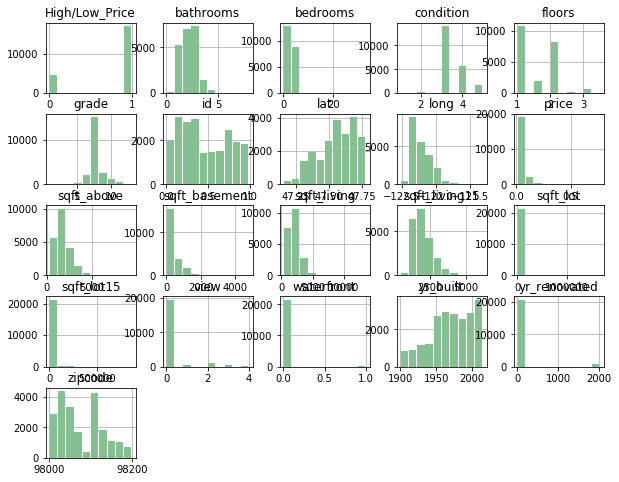

In [7]:


df.hist(figsize=(10,8), color='#86bf91', zorder=2, rwidth=0.9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id                21613 non-null int64
date              21613 non-null object
price             21613 non-null int64
bedrooms          21613 non-null int64
bathrooms         21613 non-null float64
sqft_living       21613 non-null int64
sqft_lot          21613 non-null int64
floors            21613 non-null float64
waterfront        21613 non-null int64
view              21613 non-null int64
condition         21613 non-null int64
grade             21613 non-null int64
sqft_above        21613 non-null int64
sqft_basement     21613 non-null int64
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
lat               21613 non-null float64
long              21613 non-null float64
sqft_living15     21613 non-null int64
sqft_lot15        21613 non-null int64
High/Low_Price    21613 non-null int64
dtypes: float64(4), int6

In [9]:
type(df["bathrooms"])

pandas.core.series.Series

In [10]:
pd.to_numeric(df["bathrooms"])

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
5        4.50
6        2.25
7        1.50
8        1.00
9        2.50
10       2.50
11       1.00
12       1.00
13       1.75
14       2.00
15       3.00
16       2.00
17       1.00
18       1.00
19       1.00
20       1.75
21       2.75
22       2.50
23       1.50
24       2.25
25       2.00
26       1.75
27       1.00
28       1.75
29       2.50
         ... 
21583    1.00
21584    2.50
21585    2.50
21586    2.50
21587    2.50
21588    1.50
21589    2.50
21590    3.50
21591    2.75
21592    2.25
21593    3.75
21594    2.75
21595    2.25
21596    2.75
21597    3.25
21598    2.50
21599    3.00
21600    3.75
21601    2.50
21602    1.75
21603    2.50
21604    2.00
21605    2.50
21606    3.50
21607    2.50
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [11]:

df.bathrooms.astype(float)

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
5        4.50
6        2.25
7        1.50
8        1.00
9        2.50
10       2.50
11       1.00
12       1.00
13       1.75
14       2.00
15       3.00
16       2.00
17       1.00
18       1.00
19       1.00
20       1.75
21       2.75
22       2.50
23       1.50
24       2.25
25       2.00
26       1.75
27       1.00
28       1.75
29       2.50
         ... 
21583    1.00
21584    2.50
21585    2.50
21586    2.50
21587    2.50
21588    1.50
21589    2.50
21590    3.50
21591    2.75
21592    2.25
21593    3.75
21594    2.75
21595    2.25
21596    2.75
21597    3.25
21598    2.50
21599    3.00
21600    3.75
21601    2.50
21602    1.75
21603    2.50
21604    2.00
21605    2.50
21606    3.50
21607    2.50
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

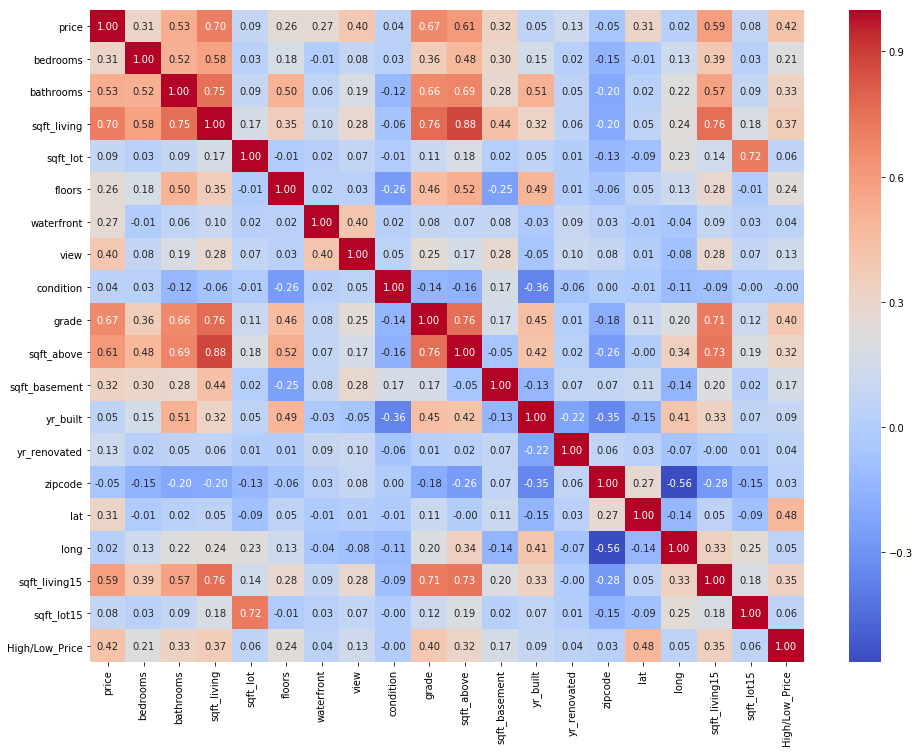

In [12]:
#Plotting the heat map to show the relationship (correlation) of the independent variables with itself and other independent variables
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')#cmap is used to diaplay the kind of color needed
plt.show()


### The important parameters being considered for the analysis on which the price of the building depends on based on a logical understanding and also a bit based on the correlation and the dummy variables creation point of view for the analysis are as follows:
### Bedrooms, Bathrooms, sqft_living,waterfront,view,grade,sqft_above ,zipcode, sqft_living15
### The other parameters like lat, long are not being considered because those can be found out from the zipcode
### View and Zipcode are being used to create the dummy variables as we cannot distinguish as it is from views or zipcode which is good or better

In [13]:
#Creation of a data frame with the important fields
df_imp = df[['sqft_living', 'bedrooms', 'bathrooms',  'grade', 'sqft_living15','zipcode','waterfront','view']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E97423978>,
      dtype=object)

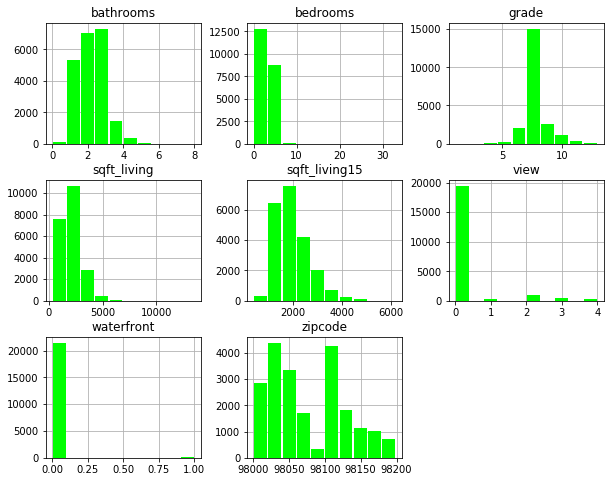

In [14]:


df_imp.hist(figsize=(10,8), color='#00FF00', zorder=2, rwidth=0.9)#Plot the histograms of the important fields

In [18]:
#Sort the high price buildings in descending order based on the zipcode to get to know in which zipcode the highest price building is located
top_price = df.sort_values('price',ascending=False)
top_price[['price','zipcode']].head(20)

,price,zipcode
7252,7700000,98102
3914,7060000,98004
9254,6890000,98039
4411,5570000,98039
1448,5350000,98004
1315,5300000,98040
1164,5110000,98033
8092,4670000,98040
2626,4500000,98155
8638,4490000,98004


## A box plot is plotted to show how the distribution of a particular variable with respect to the median and also if there are any outliers(outside extreme points) in the data with respect to the data

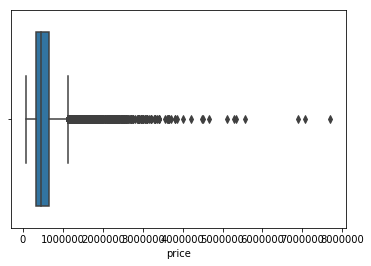

In [22]:
sns.boxplot(df['price'])

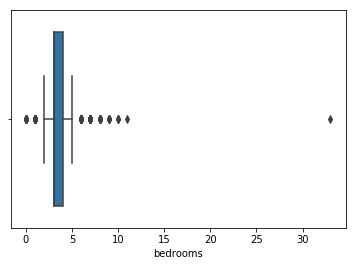

In [19]:
sns.boxplot(df['bedrooms'])

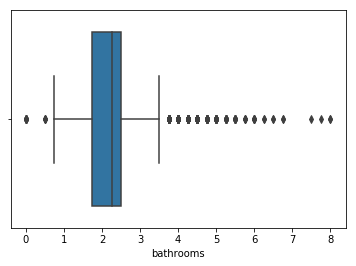

In [20]:


sns.boxplot (df ['bathrooms'])

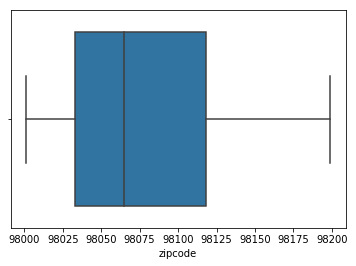

In [21]:

sns.boxplot(df['zipcode'])

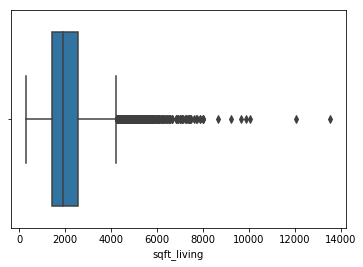

In [15]:
sns.boxplot(df['sqft_living'])

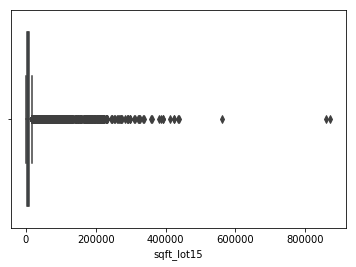

In [24]:
sns.boxplot(df['sqft_lot15'])

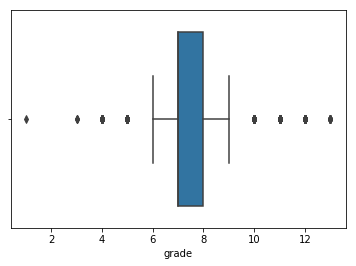

In [25]:


sns.boxplot(df['grade'])

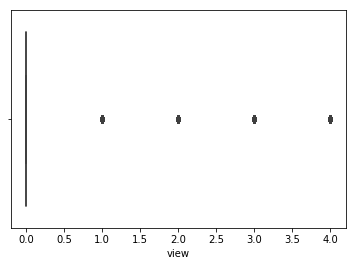

In [16]:
sns.boxplot(df['view'])

## Regplot(Regression plot is used to show how strong the relation is between the dependent and the independent variables based on fitting the line against the points and also based on how closely the points are clustered together around the line

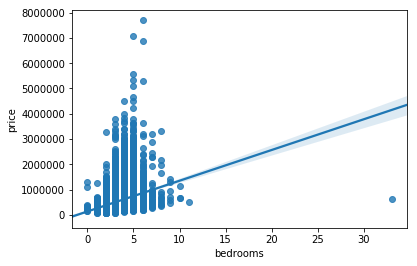

In [17]:
sns.regplot(df[ 'bedrooms'],df['price'])


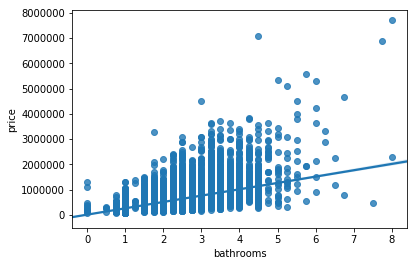

In [20]:
sns.regplot(df[ 'bathrooms'],df['price'])

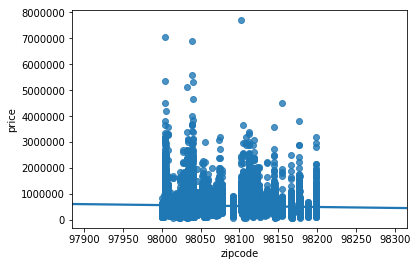

In [21]:
sns.regplot(df[ 'zipcode'],df['price'])

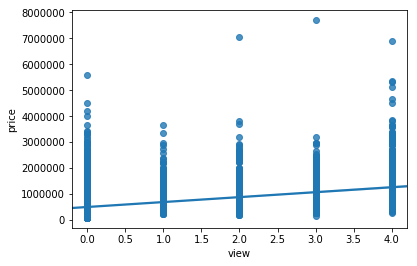

In [22]:
sns.regplot(df[ 'view'],df['price'])

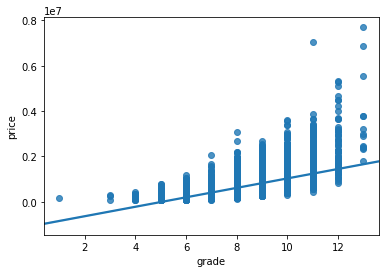

In [23]:
sns.regplot(df[ 'grade'],df['price'])

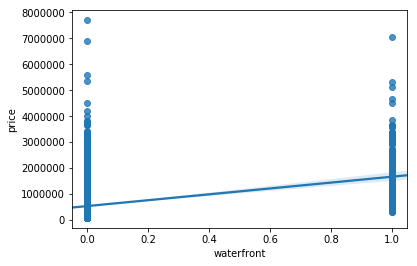

In [24]:
sns.regplot(df[ 'waterfront'],df['price'])

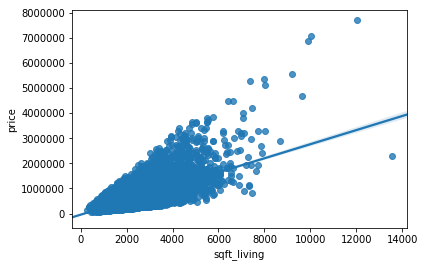

In [25]:
sns.regplot(df[ 'sqft_living'],df['price'])

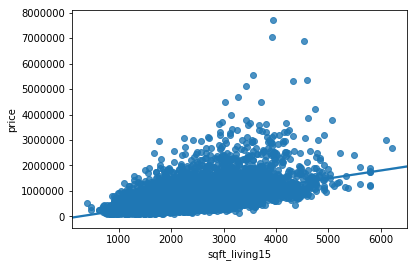

In [26]:
sns.regplot(df[ 'sqft_living15'],df['price'])

### Group top 20 rows of data based on the mean for the most important independent variables with respect to the dependent variable(price)

In [19]:
df.groupby('price')[['bedrooms', 'bathrooms','zipcode', 'grade','view','waterfront','sqft_living','sqft_living15']].mean().head(20)

,bedrooms,bathrooms,zipcode,grade,view,waterfront,sqft_living,sqft_living15
price,,,,,,,,
75000,1.000000,0.000000,98022.000000,3.000000,0.0,0.0,670.000000,1160.000000
78000,2.000000,1.000000,98168.000000,5.000000,0.0,0.0,780.000000,1700.000000
80000,1.000000,0.750000,98014.000000,4.000000,0.0,0.0,430.000000,1200.000000
81000,2.000000,1.000000,98168.000000,5.000000,0.0,0.0,730.000000,860.000000
82000,3.000000,1.000000,98146.000000,6.000000,0.0,0.0,860.000000,1140.000000
82500,2.000000,1.000000,98168.000000,5.000000,0.0,0.0,520.000000,1572.000000
83000,2.000000,1.000000,98168.000000,5.000000,0.0,0.0,900.000000,2060.000000
84000,2.000000,1.000000,98168.000000,6.000000,0.0,0.0,700.000000,1490.000000
85000,2.000000,1.000000,98032.000000,5.500000,0.0,0.0,870.000000,1160.000000


In [30]:

print(df['price'])

0         221900
1         538000
2         180000
3         604000
4         510000
5        1230000
6         257500
7         291850
8         229500
9         323000
10        662500
11        468000
12        310000
13        400000
14        530000
15        650000
16        395000
17        485000
18        189000
19        230000
20        385000
21       2000000
22        285000
23        252700
24        329000
25        233000
26        937000
27        667000
28        438000
29        719000
          ...   
21583     399950
21584     380000
21585     270000
21586     505000
21587     385000
21588     414500
21589     347500
21590    1220000
21591     572000
21592     475000
21593    1090000
21594     350000
21595     520000
21596     679950
21597    1580000
21598     541800
21599     810000
21600    1540000
21601     467000
21602     224000
21603     507250
21604     429000
21605     610685
21606    1010000
21607     475000
21608     360000
21609     400000
21610     4021

###  A joint plot is used to show bivariate distribution graphically.The dependent variable price is on the y axis and the independent variable is on the X axis

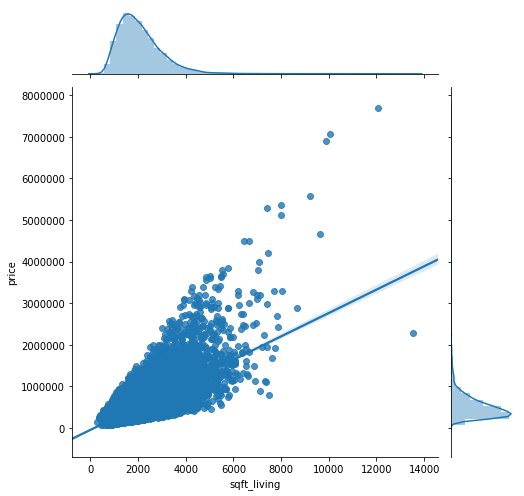

In [28]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg', size = 7)
plt.show()

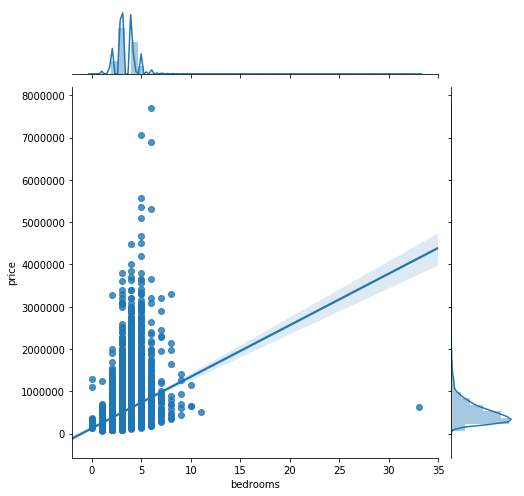

In [29]:


sns.jointplot(x="bedrooms", y="price", data=df, kind = 'reg', size = 7)
plt.show()

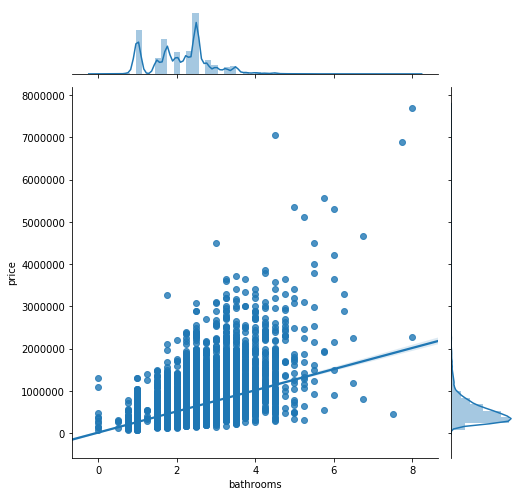

In [30]:
sns.jointplot(x="bathrooms", y="price", data=df, kind = 'reg', size = 7)
plt.show()

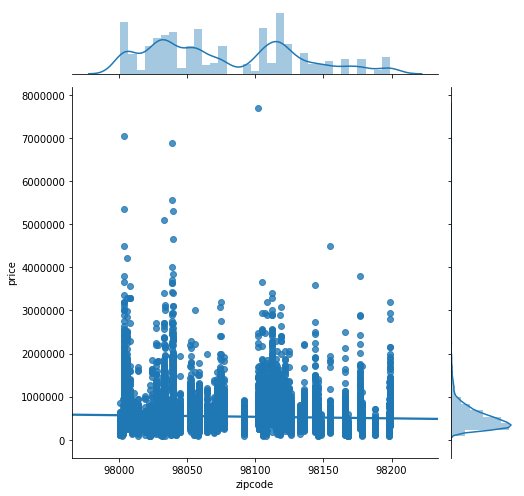

In [31]:
sns.jointplot(x="zipcode", y="price", data=df, kind = 'reg', size = 7)
plt.show()

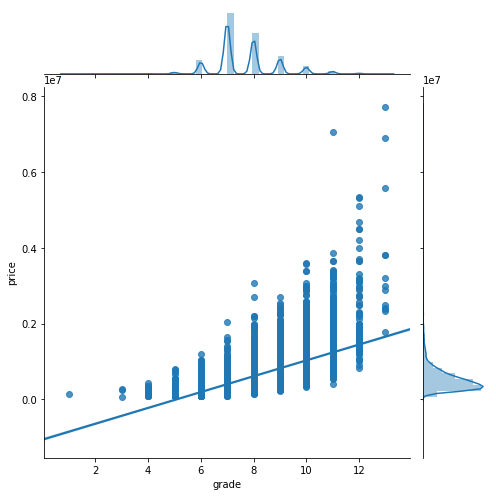

In [32]:
sns.jointplot(x="grade", y="price", data=df, kind = 'reg', size = 7)
plt.show()

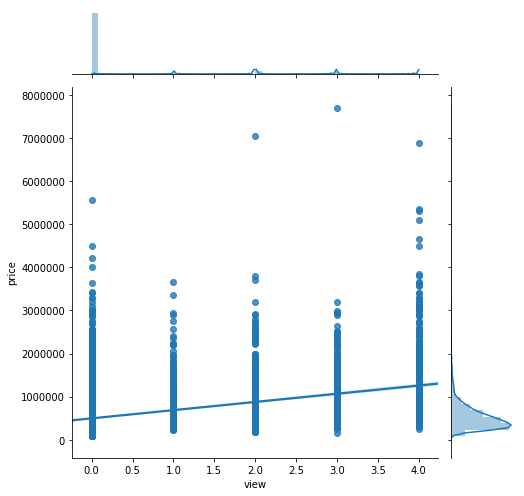

In [33]:
sns.jointplot(x="view", y="price", data=df, kind = 'reg', size = 7)
plt.show()

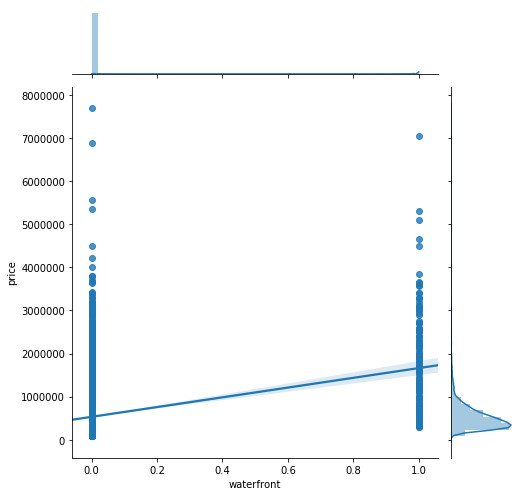

In [34]:
sns.jointplot(x="waterfront", y="price", data=df, kind = 'reg', size = 7)
plt.show()

# Linear Regression

### Linear regression is used to find the linear relationship between a model.It is used to predict a number which takes the input and the output is a continous value

### Considering atleast 5 independent variables which has atleast 1 binary independent variable(waterfront in this case) and 1 multi-class categorical variable(grade) to do the analysis on the effect on the dependent variable price

In [13]:
from sklearn.model_selection import train_test_split


### Creation of dummy variables

### We are ceating dummy variables only for View and the Zipcode fields as these fields are categorical and cannot be ranked or given an order or have a direct impact on the dependent variable. Like for instance we cannot say a zipcode is good or bad just by looking at it and the same way we cannot say if the price of a house is high or low based on the views it has got

In [14]:
viewsdu=pd.get_dummies(df['view'],drop_first=True)
viewsdu.head(5)

,1,2,3,4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [15]:
viewsdu.reset_index(inplace=True)
viewsdu = viewsdu.add_prefix("{}#".format('View'))
viewsdu =  viewsdu[['View#1','View#2','View#3','View#4']]
viewsdu.head(5)

,View#1,View#2,View#3,View#4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [16]:
zip_mean=df.groupby('zipcode')['price'].mean()

In [17]:
print(zip_mean)

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.356524e+06
98005    8.102897e+05
98006    8.599386e+05
98007    6.172540e+05
98008    6.456282e+05
98010    4.236660e+05
98011    4.903771e+05
98014    4.556171e+05
98019    4.248151e+05
98022    3.157093e+05
98023    2.867428e+05
98024    5.806379e+05
98027    6.170540e+05
98028    4.624889e+05
98029    6.126427e+05
98030    2.961880e+05
98031    3.005399e+05
98032    2.512962e+05
98033    8.039908e+05
98034    5.217400e+05
98038    3.668761e+05
98039    2.161300e+06
98040    1.194874e+06
98042    3.116321e+05
98045    4.395073e+05
98052    6.452442e+05
98053    6.782757e+05
             ...     
98092    3.349211e+05
98102    9.015162e+05
98103    5.850488e+05
98105    8.632289e+05
98106    3.195814e+05
98107    5.791098e+05
98108    3.556785e+05
98109    8.800778e+05
98112    1.096239e+06
98115    6.199441e+05
98116    6.186951e+05
98117    5.768348e+05
98118    4.176453e+05
98119    8.497148e+05
98

In [18]:
zip_sort=zip_mean.sort_values(ascending=False)
print(zip_sort)


zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    9.015162e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
98033    8.039908e+05
98199    7.921879e+05
98075    7.907347e+05
98074    6.856758e+05
98077    6.828860e+05
98053    6.782757e+05
98177    6.764194e+05
98008    6.456282e+05
98052    6.452442e+05
98122    6.345581e+05
98115    6.199441e+05
98116    6.186951e+05
98007    6.172540e+05
98027    6.170540e+05
98029    6.126427e+05
98144    5.947065e+05
98103    5.850488e+05
98024    5.806379e+05
98107    5.791098e+05
98117    5.768348e+05
             ...     
98014    4.556171e+05
98045    4.395073e+05
98019    4.248151e+05
98126    4.247346e+05
98155    4.237369e+05
98010    4.236660e+05
98056    4.208955e+05
98118    4.176453e+05
98133    3.869974e+05
98038    3.668761e+05
98146    3.594963e+05
98108    3.556785e+05
98058    3.536191e+05
98092    3.349211e+05
98

In [19]:

#To get the zip codes of the top 10 locations based on the average prices of the houses in that zipcode location
zip_sort.head(10)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    9.015162e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
Name: price, dtype: float64

### So the dummy variables are created for the following zip code values:
#### 98039,98004,98040,98112,98102,98109,98105,98006,98119,98005

In [20]:
zip_dummy = pd.get_dummies(df['zipcode'], drop_first=False)
zip_dummy.head(5)

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
zip_dummyn = pd.get_dummies(df['zipcode'], drop_first=False)
zip_dummyn.reset_index(inplace=True)
zip_dummyn = zip_dummyn.add_prefix("{}#".format('zipcode'))
zip_dummyn =  zip_dummyn[['zipcode#98039','zipcode#98004','zipcode#98040','zipcode#98112','zipcode#98102','zipcode#98109','zipcode#98105','zipcode#98006','zipcode#98119','zipcode#98005']]
#df.drop('zipcode', axis=1, inplace=True)
#df = df.join(zip_dummyn)

df.dtypes

id                  int64
date               object
price               int64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
High/Low_Price      int64
dtype: object

In [22]:
df=pd.concat([df,viewsdu,zip_dummyn],axis=1)


In [23]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode#98039,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
newdf=df.drop(['id','date','view','zipcode'],axis=1)


In [25]:
print(newdf)

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       221900         3       1.00         1180      5650     1.0   
1       538000         3       2.25         2570      7242     2.0   
2       180000         2       1.00          770     10000     1.0   
3       604000         4       3.00         1960      5000     1.0   
4       510000         3       2.00         1680      8080     1.0   
5      1230000         4       4.50         5420    101930     1.0   
6       257500         3       2.25         1715      6819     2.0   
7       291850         3       1.50         1060      9711     1.0   
8       229500         3       1.00         1780      7470     1.0   
9       323000         3       2.50         1890      6560     2.0   
10      662500         3       2.50         3560      9796     1.0   
11      468000         2       1.00         1160      6000     1.0   
12      310000         3       1.00         1430     19901     1.5   
13      400000      

In [26]:
newdf.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98039,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005
0,221900,3,1.00,1180,5650,1.0,0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


In [27]:
newdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98039,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,...,0.212501,0.271124,0.204914,0.169931,0.068726,0.065874,0.091003,0.133676,0.078078,0.065079
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,...,0.035682,0.063499,0.081289,0.016712,-0.011404,-0.013640,0.023360,0.077696,-0.010957,0.045714
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,...,0.067855,0.065403,0.089809,0.037732,0.013350,0.004021,0.005997,0.087933,0.013166,0.035552
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,...,0.090234,0.110143,0.128564,0.051198,0.006074,-0.001947,0.007964,0.135177,-0.007495,0.055597
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,...,0.002670,-0.005899,-0.003893,-0.027420,-0.019384,-0.019743,-0.024949,-0.006390,-0.025709,0.010304
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,...,0.005858,-0.014039,0.002344,0.064946,0.066050,0.030991,0.018665,-0.009803,0.051339,-0.035167
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,...,0.006934,-0.006187,0.046530,-0.009786,-0.006091,-0.006206,0.006649,0.000870,-0.008078,-0.007716
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,...,0.005222,0.016094,0.066755,0.018511,-0.004080,0.007400,0.034889,0.058813,-0.004903,0.039037
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,...,0.077965,0.106996,0.127567,0.075022,0.037380,0.021895,0.015984,0.148724,0.028764,0.062591
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,...,0.087373,0.093036,0.095244,0.029460,-0.001979,-0.012986,-0.011864,0.094954,-0.022205,0.039741


In [61]:


newdf['View#1']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
21597    0
21598    0
21599    0
21600    0
21601    0
21602    0
21603    0
21604    0
21605    0
21606    0
21607    0
21608    0
21609    0
21610    0
21611    0
21612    0
Name: View#1, Length: 21613, dtype: uint8

In [62]:
newdf['High/Low_Price']

0        0
1        1
2        0
3        1
4        1
5        1
6        0
7        0
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       0
19       0
20       1
21       1
22       0
23       0
24       1
25       0
26       1
27       1
28       1
29       1
        ..
21583    1
21584    1
21585    0
21586    1
21587    1
21588    1
21589    1
21590    1
21591    1
21592    1
21593    1
21594    1
21595    1
21596    1
21597    1
21598    1
21599    1
21600    1
21601    1
21602    0
21603    1
21604    1
21605    1
21606    1
21607    1
21608    1
21609    1
21610    1
21611    1
21612    1
Name: High/Low_Price, Length: 21613, dtype: int64




# MODEL 1

In [63]:
X=newdf.drop(["price","floors","bedrooms","sqft_lot","condition","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [64]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [65]:
print ( model.score(X_test, y_test))#Used to print the model score(as to how accurate the model is)

0.6882683358604876


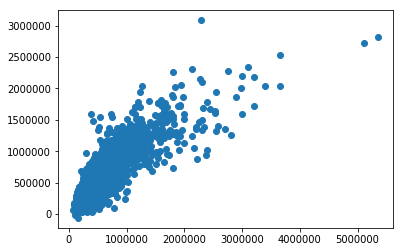

In [66]:
plt.scatter(y_test, predictions)


In [67]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)


-420187.0961813504 [-1.97830173e+04  1.79832967e+02  5.37227880e+05  8.08438560e+04
 -6.71479653e+00 -1.79089688e+01  1.15996430e+05  1.01396247e+05
  1.86365122e+05  4.07310806e+05  1.26651949e+06  6.40888817e+05
  3.69757363e+05  4.70249589e+05  3.49675098e+05  3.56506293e+05
  3.07897266e+05  1.11559778e+05  3.25535956e+05  1.68314549e+05]


In [68]:
model = sm.OLS(y_train,X_train)
results = model.fit()
# Statsmodels gives R-like statistical output like R-squared value AIC,BIC p-value,t-value,standard error
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     8005.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:51:28   Log-Likelihood:            -2.3596e+05
No. Observations:               17290   AIC:                         4.720e+05
Df Residuals:                   17270   BIC:                         4.721e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms     -1.812e+04   3171.740     -5.712      0.000   -2.43e+04   -1.19e+04
sqft_living     196.7735      4.272     46.060      0.000     188.400     205.147
waterfront     5.183e+05   2.27e+04     22.839      0.000    4.74e+05    5.63e+05
grade          1.249e+04    995.498     12.551      0.000    1.05e+04    1.44e+04
sqft_above       29.2010      4.127      7.076      0.000      21.113      37.290
sqft_living15   -17.2208      3.794     -4.539      0.000     -24.657      -9.784
View#1         1.249e+05   1.29e+04      9.696      0.000    9.97e+04     1.5e+05
View#2         1.189e+05   7757.186     15.322      0.000    1.04e+05    1.34e+05
View#3         2.172e+05   1.06e+04     20.407      0.000    1.96e+05    2.38e+05
View#4         4.557e+05   1.69e+04     26.928      0.000    4.23e+05    4.89e+05
zipcode#98039  1.309e+06   3.07e+04     42.610      0.000    1.25e+06    1.37e+06
zipcode#98004   6.68e+05   1.31e+04     51.035      0.000    6.42e+05    6.94e+05
zipcode#98040  4.076e+05   1.37e+04     29.758      0.000    3.81e+05    4.34e+05
zipcode#98112  5.051e+05   1.38e+04     36.468      0.000    4.78e+05    5.32e+05
zipcode#98102  3.892e+05   2.32e+04     16.739      0.000    3.44e+05    4.35e+05
zipcode#98109  3.823e+05   2.24e+04     17.045      0.000    3.38e+05    4.26e+05
zipcode#98105  3.164e+05   1.52e+04     20.765      0.000    2.87e+05    3.46e+05
zipcode#98006  1.467e+05   1.05e+04     13.912      0.000    1.26e+05    1.67e+05
zipcode#98119  3.501e+05   1.67e+04     20.989      0.000    3.17e+05    3.83e+05
zipcode#98005  2.007e+05   1.82e+04     11.004      0.000    1.65e+05    2.36e+05
==============================================================================
Omnibus:                    11696.920   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           815338.572
Skew:                           2.545   Prob(JB):                         0.00
Kurtosis:                      36.254   Cond. No.                     7.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  bathrooms       -1.811586e+04
sqft_living      1.967735e+02
waterfront       5.182935e+05
grade            1.249409e+04
sqft_above       2.920105e+01
sqft_living15   -1.722079e+01
View#1           1.249468e+05
View#2           1.188541e+05
View#3           2.172494e+05
View#4           4.557026e+05
zipcode#98039    1.308904e+06
zipcode#98004    6.679607e+05
zipcode#98040    4.076386e+05
zipcode#98112    5.050585e+05
zipcode#98102    3.891585e+05
zipcode#98109    3.822768e+05
zipcode#98105    3.164072e+05
zipcode#98006    1.467161e+05
zipcode#98119    3.500935e+05
zipcode#98005    2.006849e+05
dtype: float64
R2:  0.9026363277015015


## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split

In [236]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(["price","floors","bedrooms","bathrooms","grade","sqft_lot","condition","sqft_basement","lat","long","sqft_living15","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1), dtype=pd.Series)
    Y = np.array(newdf['price'], dtype=pd.Series)
    lm = linear_model.LinearRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [164]:
cross_validation(newdf)#Cross validated value returning the Root Mean Squared Error value

185477.83687573756

# Model 2

In [225]:
#Based on the pvalue observed remove the bathrooms from the first model due to highly negative t-value
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [208]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


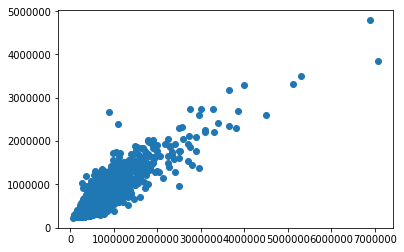

In [209]:
plt.scatter(y_test, predictions)

In [210]:
print ( model.score(X_test, y_test))

0.7647012924831378


In [211]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

323115.4219249508 [-1.92382255e+02  4.76269608e+05 -1.12377699e+04 -4.02749685e+01
  1.59309005e+00  1.11783351e+05  8.94708050e+04  1.65751621e+05
  3.08086293e+05  1.03618944e+06  5.80336803e+05  3.28833891e+05
  4.76327280e+05  3.19723398e+05  3.53381599e+05  3.22095132e+05
  8.88955718e+04  3.27686072e+05  1.72121312e+05  4.29473201e+01]


In [212]:

model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9930.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:06:55   Log-Likelihood:            -2.3403e+05
No. Observations:               17290   AIC:                         4.681e+05
Df Residuals:                   17270   BIC:                         4.683e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     -98.6430      5.896    -16.730      0.000    -110.200     -87.086
waterfront     4.763e+05   2.05e+04     23.279      0.000    4.36e+05    5.16e+05
grade          3.264e+04    866.473     37.674      0.000    3.09e+04    3.43e+04
sqft_above      -44.1195      3.819    -11.553      0.000     -51.605     -36.634
sqft_living15    -0.4089      3.389     -0.121      0.904      -7.051       6.233
View#1         1.093e+05   1.14e+04      9.610      0.000     8.7e+04    1.32e+05
View#2         8.699e+04   6898.294     12.611      0.000    7.35e+04    1.01e+05
View#3         1.654e+05   9555.955     17.304      0.000    1.47e+05    1.84e+05
View#4         3.139e+05   1.45e+04     21.685      0.000    2.85e+05    3.42e+05
zipcode#98039  1.052e+06   2.85e+04     36.923      0.000    9.96e+05    1.11e+06
zipcode#98004  5.797e+05   1.17e+04     49.441      0.000    5.57e+05    6.03e+05
zipcode#98040  3.262e+05   1.26e+04     25.851      0.000    3.01e+05    3.51e+05
zipcode#98112  4.686e+05   1.24e+04     37.734      0.000    4.44e+05    4.93e+05
zipcode#98102  3.153e+05   2.01e+04     15.715      0.000    2.76e+05    3.55e+05
zipcode#98109  3.458e+05   1.96e+04     17.637      0.000    3.07e+05    3.84e+05
zipcode#98105  3.191e+05   1.34e+04     23.724      0.000    2.93e+05    3.45e+05
zipcode#98006  8.521e+04   9642.867      8.837      0.000    6.63e+04    1.04e+05
zipcode#98119  3.173e+05   1.51e+04     20.983      0.000    2.88e+05    3.47e+05
zipcode#98005  1.617e+05   1.57e+04     10.313      0.000    1.31e+05    1.92e+05
sqft_grade       31.1106      0.525     59.261      0.000      30.082      32.140
==============================================================================
Omnibus:                     7765.850   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224794.243
Skew:                           1.564   Prob(JB):                         0.00
Kurtosis:                      20.385   Cond. No.                     4.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  sqft_living     -9.864299e+01
waterfront       4.763182e+05
grade            3.264316e+04
sqft_above      -4.411946e+01
sqft_living15   -4.089430e-01
View#1           1.092639e+05
View#2           8.699110e+04
View#3           1.653552e+05
View#4           3.138602e+05
zipcode#98039    1.051556e+06
zipcode#98004    5.797339e+05
zipcode#98040    3.262078e+05
zipcode#98112    4.686015e+05
zipcode#98102    3.153390e+05
zipcode#98109    3.457999e+05
zipcode#98105    3.190540e+05
zipcode#98006    8.521352e+04
zipcode#98119    3.173127e+05
zipcode#98005    1.616652e+05
sqft_grade       3.111062e+01
dtype: float64
R2:  0.9200002374520171


In [227]:
cross_validation(newdf)#Return the RMSE score of the model based on the cross validation function

185467.75943656047



# MODEL 3

In [214]:
#Elimimating sqft_living15 due to high p-value compared to the other parameters
X=newdf.drop(["price","bedrooms","floors","sqft_lot","sqft_living15","condition","bathrooms","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 19) (17290,)
(4323, 19) (4323,)


In [215]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

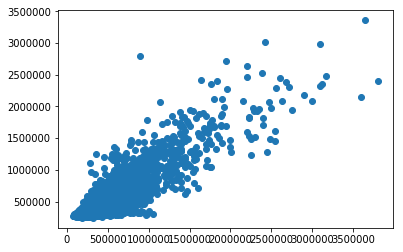

In [216]:
plt.scatter(y_test, predictions)

In [217]:



print ( model.score(X_test, y_test))

0.7348947224046426


In [218]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

416096.2038591247 [-2.34261556e+02  5.37521319e+05 -2.43878706e+04 -3.84129016e+01
  1.20458624e+05  8.80117017e+04  1.50012837e+05  3.00981359e+05
  1.10358852e+06  6.14052750e+05  3.32152471e+05  4.53194750e+05
  3.29807656e+05  3.40629516e+05  3.25881188e+05  9.40372042e+04
  3.31376389e+05  1.61221384e+05  4.86374640e+01]


In [219]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:08:18   Log-Likelihood:            -2.3455e+05
No. Observations:               17290   AIC:                         4.691e+05
Df Residuals:                   17271   BIC:                         4.693e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living    -114.3168      6.043    -18.917      0.000    -126.162    -102.472
waterfront     5.467e+05   2.12e+04     25.795      0.000    5.05e+05    5.88e+05
grade          3.163e+04    740.486     42.712      0.000    3.02e+04    3.31e+04
sqft_above      -44.5039      3.901    -11.407      0.000     -52.151     -36.857
View#1         1.164e+05    1.2e+04      9.686      0.000    9.29e+04     1.4e+05
View#2         8.528e+04   7074.453     12.055      0.000    7.14e+04    9.91e+04
View#3         1.476e+05   9682.625     15.244      0.000    1.29e+05    1.67e+05
View#4         3.069e+05   1.52e+04     20.207      0.000    2.77e+05    3.37e+05
zipcode#98039  1.146e+06   3.14e+04     36.531      0.000    1.08e+06    1.21e+06
zipcode#98004  6.144e+05    1.2e+04     51.182      0.000    5.91e+05    6.38e+05
zipcode#98040  3.263e+05   1.31e+04     24.880      0.000    3.01e+05    3.52e+05
zipcode#98112  4.437e+05   1.29e+04     34.511      0.000    4.18e+05    4.69e+05
zipcode#98102  3.226e+05   2.04e+04     15.784      0.000    2.83e+05    3.63e+05
zipcode#98109  3.303e+05   2.01e+04     16.447      0.000    2.91e+05     3.7e+05
zipcode#98105  3.216e+05   1.36e+04     23.679      0.000    2.95e+05    3.48e+05
zipcode#98006  8.885e+04   9825.113      9.043      0.000    6.96e+04    1.08e+05
zipcode#98119   3.18e+05   1.56e+04     20.411      0.000    2.87e+05    3.49e+05
zipcode#98005  1.502e+05   1.65e+04      9.119      0.000    1.18e+05    1.83e+05
sqft_grade       33.5326      0.539     62.215      0.000      32.476      34.589
==============================================================================
Omnibus:                     8754.965   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           350028.443
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      24.759   Cond. No.                     4.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  sqft_living     -1.143168e+02
waterfront       5.466628e+05
grade            3.162732e+04
sqft_above      -4.450385e+01
View#1           1.164326e+05
View#2           8.528310e+04
View#3           1.476030e+05
View#4           3.069004e+05
zipcode#98039    1.145709e+06
zipcode#98004    6.144467e+05
zipcode#98040    3.262616e+05
zipcode#98112    4.436600e+05
zipcode#98102    3.226158e+05
zipcode#98109    3.302766e+05
zipcode#98105    3.215844e+05
zipcode#98006    8.885313e+04
zipcode#98119    3.179674e+05
zipcode#98005    1.502293e+05
sqft_grade       3.353258e+01
dtype: float64
R2:  0.9175639767753501


In [229]:
cross_validation(newdf)

185447.9789427207

### Model 2 is considered to be the best model due to the least AIC,BIC values and Highest R-Squared values and also due to the inpar RMSE values and also the most accurate model in terms of the accuracy with the other models.The relationship is significant between the dependent variables and the independent variables
### Model assumptions are not violated
### Yes the model makes sense.The independent variables considered are based on the correlation of the variables and also the dummy variables created in the analysis
### The cross validation of the model is in par with the other models and adding on to that
### The R-Squared value has increased and the AIC ,BIC, values have decreased meaning that the data points are not too far off from the data and the amount of deviation of the estimated and the observed values is not very high.Hence making it a good model

# Logistic Regression


## Logistic regression is used to check how accurate a particular model is in predicting if a given house price belongs to either high price or low price category


### Since Zip code values are being considered, the characteristics which can be found out from the zip code like lat,long are eliminated based on logical reasoning

### Considering atleast 5 independent variables which has atleast 1 binary independent variable(waterfront in this case) and 1 multi-class categorical variable(grade) to do the analysis on the effect on the dependent variable price

# Model 1

In [89]:
newdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98039,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,...,0.212501,0.271124,0.204914,0.169931,0.068726,0.065874,0.091003,0.133676,0.078078,0.065079
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,...,0.035682,0.063499,0.081289,0.016712,-0.011404,-0.013640,0.023360,0.077696,-0.010957,0.045714
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,...,0.067855,0.065403,0.089809,0.037732,0.013350,0.004021,0.005997,0.087933,0.013166,0.035552
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,...,0.090234,0.110143,0.128564,0.051198,0.006074,-0.001947,0.007964,0.135177,-0.007495,0.055597
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,...,0.002670,-0.005899,-0.003893,-0.027420,-0.019384,-0.019743,-0.024949,-0.006390,-0.025709,0.010304
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,...,0.005858,-0.014039,0.002344,0.064946,0.066050,0.030991,0.018665,-0.009803,0.051339,-0.035167
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,...,0.006934,-0.006187,0.046530,-0.009786,-0.006091,-0.006206,0.006649,0.000870,-0.008078,-0.007716
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,...,0.005222,0.016094,0.066755,0.018511,-0.004080,0.007400,0.034889,0.058813,-0.004903,0.039037
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,...,0.077965,0.106996,0.127567,0.075022,0.037380,0.021895,0.015984,0.148724,0.028764,0.062591
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,...,0.087373,0.093036,0.095244,0.029460,-0.001979,-0.012986,-0.011864,0.094954,-0.022205,0.039741


In [90]:
X=newdf.drop(["price","bedrooms","floors","sqft_lot","condition","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['High/Low_Price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:


logmodel=LogisticRegression()

In [93]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
predictions=logmodel.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.54      0.09      0.15       919\n           1       0.80      0.98      0.88      3404\n\n   micro avg       0.79      0.79      0.79      4323\n   macro avg       0.67      0.53      0.52      4323\nweighted avg       0.74      0.79      0.73      4323\n'

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test,predictions)

array([[  81,  838],
       [  69, 3335]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,predictions)

0.7901919962988665

In [101]:
import statsmodels.formula.api as sm
def log_model(x):
    model = sm.Logit(newdf['High/Low_Price'],x).fit()
    print(model.summary())
    


In [102]:
log_model(newdf['grade'])
log_model(newdf['sqft_above'])
log_model(newdf['waterfront'])
log_model(newdf['sqft_living15'])
log_model(newdf['sqft_living'])
log_model(newdf['bathrooms'])


Optimization terminated successfully.
         Current function value: 0.484579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         High/Low_Price   No. Observations:                21613
Model:                          Logit   Df Residuals:                    21612
Method:                           MLE   Df Model:                            0
Date:                Sun, 24 Feb 2019   Pseudo R-squ.:                 0.06065
Time:                        15:51:32   Log-Likelihood:                -10473.
converged:                       True   LL-Null:                       -11149.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
grade          0.1902      0.002     83.103      0.000       0.186       0.195
Optimization terminated succe

In [103]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(["price","bedrooms","sqft_living","sqft_living15","floors","sqft_lot","condition","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1), dtype=pd.Series)
    Y = np.array(newdf['High/Low_Price'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [104]:
cross_validation(newdf)

0.36952229814984655






# MODEL 2

In [105]:
#Eliminate sqft_living due to very high standard error
X=newdf.drop(["price","bedrooms","floors","sqft_lot","condition","sqft_living","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['High/Low_Price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 19) (17290,)
(4323, 19) (4323,)


In [106]:

logmodel=LogisticRegression()

In [107]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
predictions=logmodel.predict(X_test)

In [109]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.71      0.28      0.40       920\n           1       0.83      0.97      0.90      3403\n\n   micro avg       0.82      0.82      0.82      4323\n   macro avg       0.77      0.63      0.65      4323\nweighted avg       0.81      0.82      0.79      4323\n'

In [110]:
confusion_matrix(y_test,predictions)

array([[ 259,  661],
       [ 106, 3297]], dtype=int64)

In [111]:
log_model(newdf['grade'])
log_model(newdf['sqft_above'])
log_model(newdf['waterfront'])
log_model(newdf['sqft_living15'])
log_model(newdf['bathrooms'])


Optimization terminated successfully.
         Current function value: 0.484579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         High/Low_Price   No. Observations:                21613
Model:                          Logit   Df Residuals:                    21612
Method:                           MLE   Df Model:                            0
Date:                Sun, 24 Feb 2019   Pseudo R-squ.:                 0.06065
Time:                        15:51:34   Log-Likelihood:                -10473.
converged:                       True   LL-Null:                       -11149.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
grade          0.1902      0.002     83.103      0.000       0.186       0.195
Optimization terminated succe

In [112]:
accuracy_score(y_test,predictions)

0.8225769141799676

In [113]:
cross_validation(newdf)

0.36952229814984655

# MODEL 3

In [114]:
#Eliminate the sqft_living 15 due to high standard error
X=newdf.drop(["price","bedrooms","floors","sqft_lot","condition","sqft_living","sqft_living15","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['High/Low_Price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 18) (17290,)
(4323, 18) (4323,)


In [115]:
logmodel=LogisticRegression()

In [116]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
predictions=logmodel.predict(X_test)

In [118]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.61      0.23      0.33       899\n           1       0.83      0.96      0.89      3424\n\n   micro avg       0.81      0.81      0.81      4323\n   macro avg       0.72      0.59      0.61      4323\nweighted avg       0.78      0.81      0.77      4323\n'

In [119]:
confusion_matrix(y_test,predictions)

array([[ 203,  696],
       [ 129, 3295]], dtype=int64)

In [120]:
log_model(newdf['grade'])
log_model(newdf['sqft_above'])
log_model(newdf['waterfront'])
log_model(newdf['bathrooms'])

Optimization terminated successfully.
         Current function value: 0.484579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         High/Low_Price   No. Observations:                21613
Model:                          Logit   Df Residuals:                    21612
Method:                           MLE   Df Model:                            0
Date:                Sun, 24 Feb 2019   Pseudo R-squ.:                 0.06065
Time:                        15:51:35   Log-Likelihood:                -10473.
converged:                       True   LL-Null:                       -11149.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
grade          0.1902      0.002     83.103      0.000       0.186       0.195
Optimization terminated succe

In [121]:
accuracy_score(y_test,predictions)

0.8091603053435115

In [122]:
cross_validation(newdf)

0.36952229814984655

### Model 2 is considered to be the best model due to highest accuracy score and in par RMSE value with the other model.
### Model assumptions are not violated
### It is a significant model and it makes sense the independent variables considedred are the dummy variables and the variables that have the high correlation with the dependent variable
### Hence we can say that the model is 82.2% accurate in deteremining if a particular house belongs to wither the High price or the Low price category based on the given independent variable inputs
### Hence we can say that the model has a probability of 0.82 in determining if a given house belongs to high price or the low price category.

# MULTI COLLINEARITY

### The sqft_living and the grade term are hiving the higest correlation so we are considering those the sqft_living term alone from the Model 2 of the linear regression model which is the best an performing the multi-collinearity test with it

In [123]:
newdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98039,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,...,0.212501,0.271124,0.204914,0.169931,0.068726,0.065874,0.091003,0.133676,0.078078,0.065079
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,...,0.035682,0.063499,0.081289,0.016712,-0.011404,-0.013640,0.023360,0.077696,-0.010957,0.045714
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,...,0.067855,0.065403,0.089809,0.037732,0.013350,0.004021,0.005997,0.087933,0.013166,0.035552
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,...,0.090234,0.110143,0.128564,0.051198,0.006074,-0.001947,0.007964,0.135177,-0.007495,0.055597
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,...,0.002670,-0.005899,-0.003893,-0.027420,-0.019384,-0.019743,-0.024949,-0.006390,-0.025709,0.010304
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,...,0.005858,-0.014039,0.002344,0.064946,0.066050,0.030991,0.018665,-0.009803,0.051339,-0.035167
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,...,0.006934,-0.006187,0.046530,-0.009786,-0.006091,-0.006206,0.006649,0.000870,-0.008078,-0.007716
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,...,0.005222,0.016094,0.066755,0.018511,-0.004080,0.007400,0.034889,0.058813,-0.004903,0.039037
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,...,0.077965,0.106996,0.127567,0.075022,0.037380,0.021895,0.015984,0.148724,0.028764,0.062591
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,...,0.087373,0.093036,0.095244,0.029460,-0.001979,-0.012986,-0.011864,0.094954,-0.022205,0.039741


In [230]:
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","grade","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 19) (17290,)
(4323, 19) (4323,)


In [231]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [232]:
print ( model.score(X_test, y_test))

0.7540653547964291


In [233]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

247644.81008387578 [-1.81778597e+02  4.74228253e+05 -3.59714083e+01 -3.05543653e+00
  1.25475731e+05  9.23721532e+04  1.49689360e+05  3.33527087e+05
  1.11383905e+06  6.09515450e+05  3.29622504e+05  4.76563478e+05
  2.99967631e+05  3.49083391e+05  3.37901641e+05  8.14606300e+04
  3.22196976e+05  1.59280761e+05  4.11491188e+01]


In [234]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     9393.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:            -2.3506e+05
No. Observations:               17290   AIC:                         4.702e+05
Df Residuals:                   17271   BIC:                         4.703e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     -10.9129      5.678     -1.922      0.055     -22.042       0.216
waterfront     4.825e+05   2.13e+04     22.655      0.000    4.41e+05    5.24e+05
sqft_above      -15.8228      4.037     -3.920      0.000     -23.735      -7.910
sqft_living15    69.2761      2.999     23.099      0.000      63.398      75.155
View#1         1.144e+05   1.23e+04      9.329      0.000    9.03e+04    1.38e+05
View#2         8.617e+04   7346.272     11.730      0.000    7.18e+04    1.01e+05
View#3         1.356e+05   9978.618     13.591      0.000    1.16e+05    1.55e+05
View#4         3.274e+05   1.57e+04     20.840      0.000    2.97e+05    3.58e+05
zipcode#98039  1.123e+06    2.9e+04     38.750      0.000    1.07e+06    1.18e+06
zipcode#98004  6.032e+05   1.26e+04     48.004      0.000    5.79e+05    6.28e+05
zipcode#98040  3.073e+05   1.34e+04     22.882      0.000    2.81e+05    3.34e+05
zipcode#98112  4.856e+05   1.37e+04     35.523      0.000    4.59e+05    5.12e+05
zipcode#98102  3.355e+05   2.09e+04     16.061      0.000    2.95e+05    3.76e+05
zipcode#98109  3.821e+05   2.18e+04     17.529      0.000    3.39e+05    4.25e+05
zipcode#98105  3.509e+05   1.42e+04     24.655      0.000    3.23e+05    3.79e+05
zipcode#98006  6.836e+04   1.01e+04      6.739      0.000    4.85e+04    8.83e+04
zipcode#98119  3.578e+05   1.56e+04     22.952      0.000    3.27e+05    3.88e+05
zipcode#98005  1.419e+05   1.69e+04      8.408      0.000    1.09e+05    1.75e+05
sqft_grade       23.2676      0.502     46.324      0.000      22.283      24.252
==============================================================================
Omnibus:                     6544.036   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162522.899
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                      17.807   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  sqft_living     -1.091286e+01
waterfront       4.824753e+05
sqft_above      -1.582275e+01
sqft_living15    6.927612e+01
View#1           1.143733e+05
View#2           8.617009e+04
View#3           1.356244e+05
View#4           3.274220e+05
zipcode#98039    1.122809e+06
zipcode#98004    6.031907e+05
zipcode#98040    3.072674e+05
zipcode#98112    4.856061e+05
zipcode#98102    3.354667e+05
zipcode#98109    3.820645e+05
zipcode#98105    3.508611e+05
zipcode#98006    6.836457e+04
zipcode#98119    3.578303e+05
zipcode#98005    1.419231e+05
sqft_grade       2.326760e+01
dtype: float64
R2:  0.9117668566073347


In [237]:
cross_validation(newdf)

185447.9789427207

### Yes the model has multi collinearity
### So the model which has multicollinearity when included gives better results rather than when excluded in the regression analysis as a model with both sqft_living15 and grade in the model give better results rather than when grade parameter is remeoved and only the sqft_living is included but even when included in the model it gives a good result by having an R-Squared value of 0.912

# Stepwise Regression

## Performing stepwise regression for the model based on the Model 2 of Linear Regression by starting with 1 independent variable and adding one by one at each time to each model

## MODEL 1

In [242]:
#Gives parameters one by one
X=newdf[['sqft_living']]
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 1) (17290,)
(4323, 1) (4323,)


In [243]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [244]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-50524.12316057482 [284.01566306]


In [245]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 8.986e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:25:21   Log-Likelihood:            -2.4030e+05
No. Observations:               17290   AIC:                         4.806e+05
Df Residuals:                   17289   BIC:                         4.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.6841      0.880    299.771      0.000     261.960     265.408
==============================================================================
Omnibus:                    13276.167   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           650663.385
Skew:                           3.252   Prob(JB):                         0.00
Kurtosis:                      32.341   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 2

In [246]:
X=newdf[['waterfront','sqft_living']]
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 2) (17290,)
(4323, 2) (4323,)


In [247]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [248]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-34032.24661120935 [8.62033917e+05 2.73498035e+02]


In [249]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 4.933e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:25:37   Log-Likelihood:            -2.3966e+05
No. Observations:               17290   AIC:                         4.793e+05
Df Residuals:                   17288   BIC:                         4.793e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
waterfront   8.722e+05   2.25e+04     38.815      0.000    8.28e+05    9.16e+05
sqft_living   259.7771      0.853    304.589      0.000     258.105     261.449
==============================================================================
Omnibus:                    10995.222   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           351354.352
Skew:                           2.560   Prob(JB):                         0.00
Kurtosis:                      24.482   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL 3

In [250]:
X=newdf[['grade','sqft_living','waterfront']]
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 3) (17290,)
(4323, 3) (4323,)


In [251]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-577663.4652469525 [9.64140867e+04 1.79779602e+02 8.49462495e+05]


In [252]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 3.290e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:25:51   Log-Likelihood:            -2.3963e+05
No. Observations:               17290   AIC:                         4.793e+05
Df Residuals:                   17287   BIC:                         4.793e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
grade        4163.2038    803.188      5.183      0.000    2588.874    5737.533
sqft_living   246.3819      2.748     89.659      0.000     240.996     251.768
waterfront   8.701e+05   2.28e+04     38.083      0.000    8.25e+05    9.15e+05
==============================================================================
Omnibus:                    12374.093   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           569941.714
Skew:                           2.929   Prob(JB):                         0.00
Kurtosis:                      30.510   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL 4

In [253]:
X=newdf[['sqft_above','sqft_living','waterfront','grade']]
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 4) (17290,)
(4323, 4) (4323,)


In [254]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-620666.8653323409 [-7.29251351e+01  2.23484449e+02  8.62643146e+05  1.07083920e+05]


In [255]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 2.512e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:26:51   Log-Likelihood:            -2.3941e+05
No. Observations:               17290   AIC:                         4.788e+05
Df Residuals:                   17286   BIC:                         4.789e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_above    -27.6545      4.873     -5.676      0.000     -37.205     -18.104
sqft_living   261.4340      4.475     58.427      0.000     252.663     270.205
waterfront   8.886e+05   2.23e+04     39.877      0.000    8.45e+05    9.32e+05
grade        6377.8218    813.307      7.842      0.000    4783.658    7971.986
==============================================================================
Omnibus:                    11677.210   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434501.681
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      26.935   Cond. No.                     3.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL 5

In [256]:
X=newdf[['sqft_living15','sqft_living','waterfront','grade','sqft_above']]
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 5) (17290,)
(4323, 5) (4323,)


In [257]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-634346.9780688719 [ 2.25408178e+01  2.14220816e+02  8.26876908e+05  1.05296197e+05
 -7.13794105e+01]


In [258]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 1.990e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:27:10   Log-Likelihood:            -2.3950e+05
No. Observations:               17290   AIC:                         4.790e+05
Df Residuals:                   17285   BIC:                         4.791e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living15    31.3117      4.572      6.849      0.000      22.351      40.273
sqft_living     250.8438      4.671     53.707      0.000     241.689     259.999
waterfront      8.59e+05   2.22e+04     38.755      0.000    8.16e+05    9.02e+05
grade           898.9042   1045.648      0.860      0.390   -1150.671    2948.480
sqft_above      -26.2816      4.944     -5.316      0.000     -35.972     -16.591
==============================================================================
Omnibus:                    12681.768   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643097.513
Skew:                           3.010   Prob(JB):                         0.00
Kurtosis:                      32.265   Cond. No.                     4.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL 6

In [259]:
#Add all the dummy variables with the previous one in the last and final model and evaluate
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [260]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

384321.201914727 [-2.26090299e+02  5.12610875e+05 -1.89282433e+04 -3.51408364e+01
 -3.60002631e+00  1.23449716e+05  9.30670377e+04  1.64202668e+05
  3.05352259e+05  1.06846386e+06  6.11634152e+05  3.40688810e+05
  4.81260788e+05  3.27138499e+05  3.28089213e+05  3.34260985e+05
  8.09673067e+04  3.27052470e+05  1.69176023e+05  4.70523681e+01]


In [261]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     9646.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:29:43   Log-Likelihood:            -2.3443e+05
No. Observations:               17290   AIC:                         4.689e+05
Df Residuals:                   17270   BIC:                         4.691e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living    -113.8874      6.074    -18.750      0.000    -125.793    -101.982
waterfront      5.17e+05   2.05e+04     25.232      0.000    4.77e+05    5.57e+05
grade          3.314e+04    887.787     37.334      0.000    3.14e+04    3.49e+04
sqft_above      -39.3978      3.937    -10.008      0.000     -47.114     -31.681
sqft_living15    -6.0562      3.476     -1.742      0.081     -12.869       0.756
View#1         1.206e+05   1.16e+04     10.379      0.000    9.78e+04    1.43e+05
View#2         9.087e+04   7120.974     12.761      0.000    7.69e+04    1.05e+05
View#3         1.631e+05   9566.250     17.048      0.000    1.44e+05    1.82e+05
View#4         3.122e+05   1.52e+04     20.598      0.000    2.82e+05    3.42e+05
zipcode#98039  1.097e+06   2.89e+04     38.015      0.000    1.04e+06    1.15e+06
zipcode#98004  6.134e+05   1.21e+04     50.578      0.000     5.9e+05    6.37e+05
zipcode#98040  3.366e+05   1.28e+04     26.329      0.000    3.12e+05    3.62e+05
zipcode#98112  4.727e+05   1.29e+04     36.681      0.000    4.47e+05    4.98e+05
zipcode#98102  3.228e+05   2.04e+04     15.797      0.000    2.83e+05    3.63e+05
zipcode#98109  3.176e+05   2.05e+04     15.470      0.000    2.77e+05    3.58e+05
zipcode#98105  3.284e+05    1.4e+04     23.542      0.000    3.01e+05    3.56e+05
zipcode#98006  7.635e+04   9607.305      7.947      0.000    5.75e+04    9.52e+04
zipcode#98119  3.144e+05   1.54e+04     20.446      0.000    2.84e+05    3.45e+05
zipcode#98005  1.599e+05   1.63e+04      9.818      0.000    1.28e+05    1.92e+05
sqft_grade       32.9046      0.541     60.864      0.000      31.845      33.964
==============================================================================
Omnibus:                     8527.543   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336683.972
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                      24.350   Cond. No.                     4.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## It is clearly evident from the models that as and when a highly correlated independent variable with respect to the dependent variable is added to the model, the R-Squared values remains the same or increases and there is also slight decrease in the AIC and BIC values which is a good sign of the model performance and it increase from model to model

# Interaction Effect

## Interaction effect is observed by creating a product term which is a product of two highly correlated and significant term affecting the dependent variable to see their combined effect on the dependent variable synergistically

# MODEL 1

In [28]:
newdf.insert(32, "sqft_grade",True) #Between sqft_living and sqft_grade

In [29]:
newdf['sqft_grade']=newdf['sqft_living']*newdf['grade']

In [30]:
newdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98004,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005,sqft_grade
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,...,0.271124,0.204914,0.169931,0.068726,0.065874,0.091003,0.133676,0.078078,0.065079,0.756303
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,...,0.063499,0.081289,0.016712,-0.011404,-0.013640,0.023360,0.077696,-0.010957,0.045714,0.505171
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,...,0.065403,0.089809,0.037732,0.013350,0.004021,0.005997,0.087933,0.013166,0.035552,0.737603
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,...,0.110143,0.128564,0.051198,0.006074,-0.001947,0.007964,0.135177,-0.007495,0.055597,0.973741
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,...,-0.005899,-0.003893,-0.027420,-0.019384,-0.019743,-0.024949,-0.006390,-0.025709,0.010304,0.172427
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,...,-0.014039,0.002344,0.064946,0.066050,0.030991,0.018665,-0.009803,0.051339,-0.035167,0.373130
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,...,-0.006187,0.046530,-0.009786,-0.006091,-0.006206,0.006649,0.000870,-0.008078,-0.007716,0.113135
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,...,0.016094,0.066755,0.018511,-0.004080,0.007400,0.034889,0.058813,-0.004903,0.039037,-0.084951
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,...,0.106996,0.127567,0.075022,0.037380,0.021895,0.015984,0.148724,0.028764,0.062591,0.847909
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,...,0.093036,0.095244,0.029460,-0.001979,-0.012986,-0.011864,0.094954,-0.022205,0.039741,0.882077


## It can be noted that the correlation is high synergistically when the two independent variables are multiplied together with the dependent variable price

In [270]:
#Adding sqft_grade along without sqft_living and grade and with other variables
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_living","grade","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 18) (17290,)
(4323, 18) (4323,)


In [271]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

154820.634787302 [ 4.68770829e+05 -5.10863880e+01 -1.24706045e+01  1.10469199e+05
  9.06325601e+04  1.57480048e+05  3.70744914e+05  1.18268513e+06
  5.82951369e+05  3.56345976e+05  4.65017351e+05  3.33138299e+05
  3.53729432e+05  3.16533334e+05  1.03605946e+05  3.33156826e+05
  1.63225910e+05  2.67611828e+01]


In [273]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:42:52   Log-Likelihood:            -2.3486e+05
No. Observations:               17290   AIC:                         4.698e+05
Df Residuals:                   17272   BIC:                         4.699e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
waterfront     4.786e+05   2.11e+04     22.670      0.000    4.37e+05     5.2e+05
sqft_above      -17.5149      3.831     -4.572      0.000     -25.024     -10.005
sqft_living15    62.3015      2.531     24.615      0.000      57.340      67.263
View#1         1.101e+05    1.2e+04      9.137      0.000    8.65e+04    1.34e+05
View#2         8.556e+04   7216.416     11.856      0.000    7.14e+04    9.97e+04
View#3         1.445e+05      1e+04     14.385      0.000    1.25e+05    1.64e+05
View#4         3.521e+05   1.55e+04     22.722      0.000    3.22e+05    3.82e+05
zipcode#98039  1.144e+06   3.23e+04     35.455      0.000    1.08e+06    1.21e+06
zipcode#98004  5.631e+05    1.2e+04     47.119      0.000     5.4e+05    5.87e+05
zipcode#98040  3.274e+05   1.31e+04     25.063      0.000    3.02e+05    3.53e+05
zipcode#98112  4.716e+05   1.34e+04     35.261      0.000    4.45e+05    4.98e+05
zipcode#98102  3.606e+05   2.08e+04     17.362      0.000     3.2e+05    4.01e+05
zipcode#98109  3.761e+05   2.06e+04     18.300      0.000    3.36e+05    4.16e+05
zipcode#98105  3.333e+05   1.45e+04     23.017      0.000    3.05e+05    3.62e+05
zipcode#98006  8.042e+04   9826.099      8.185      0.000    6.12e+04    9.97e+04
zipcode#98119  3.602e+05   1.61e+04     22.385      0.000    3.29e+05    3.92e+05
zipcode#98005  1.455e+05   1.71e+04      8.532      0.000    1.12e+05    1.79e+05
sqft_grade       22.8595      0.321     71.294      0.000      22.231      23.488
==============================================================================
Omnibus:                     6895.752   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192655.473
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                      19.137   Cond. No.                     4.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Significant relation is there between the terms tested for the interaction effect
### Improvement is there in the correlation of the variables when the variables are multiplied together and treated together as a unit synergistically

# MODEL 2

In [31]:
newdf.insert(32, "above_living",True)#Interaction effect is being implemented between the sqft_living15 and sqft_above parameters

In [32]:
newdf['above_living']=newdf['sqft_living15']*newdf['sqft_above']

In [33]:
newdf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode#98040,zipcode#98112,zipcode#98102,zipcode#98109,zipcode#98105,zipcode#98006,zipcode#98119,zipcode#98005,above_living,sqft_grade
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,...,0.204914,0.169931,0.068726,0.065874,0.091003,0.133676,0.078078,0.065079,0.649358,0.756303
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,...,0.081289,0.016712,-0.011404,-0.013640,0.023360,0.077696,-0.010957,0.045714,0.419279,0.505171
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,...,0.089809,0.037732,0.013350,0.004021,0.005997,0.087933,0.013166,0.035552,0.634397,0.737603
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,...,0.128564,0.051198,0.006074,-0.001947,0.007964,0.135177,-0.007495,0.055597,0.856682,0.973741
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,...,-0.003893,-0.027420,-0.019384,-0.019743,-0.024949,-0.006390,-0.025709,0.010304,0.167045,0.172427
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,...,0.002344,0.064946,0.066050,0.030991,0.018665,-0.009803,0.051339,-0.035167,0.415989,0.373130
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,...,0.046530,-0.009786,-0.006091,-0.006206,0.006649,0.000870,-0.008078,-0.007716,0.084388,0.113135
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,...,0.066755,0.018511,-0.004080,0.007400,0.034889,0.058813,-0.004903,0.039037,-0.137711,-0.084951
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,...,0.127567,0.075022,0.037380,0.021895,0.015984,0.148724,0.028764,0.062591,0.765123,0.847909
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,...,0.095244,0.029460,-0.001979,-0.012986,-0.011864,0.094954,-0.022205,0.039741,0.924707,0.882077


## Synergistically the models have better correlation between sqft_above*sqft_living15 than when used individually

In [34]:
#Adding sqft_grade along without sqft_living and grade and with other variables
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_living15","sqft_above","sqft_grade","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 18) (17290,)
(4323, 18) (4323,)


In [35]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print (results.intercept_, results.coef_)

-354500.98989225354 [1.34117321e+02 5.01622988e+05 6.78428251e+04 1.29201294e+05
 1.05681470e+05 1.83002361e+05 3.76301970e+05 1.21857635e+06
 6.46032505e+05 3.73153815e+05 4.92599422e+05 3.81241550e+05
 3.46850282e+05 3.31944692e+05 1.09787731e+05 3.34118656e+05
 1.69256659e+05 9.60492239e-03]


In [36]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()
# Statsmodels gives R-like statistical output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     9072.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:21:58   Log-Likelihood:            -2.3577e+05
No. Observations:               17290   AIC:                         4.716e+05
Df Residuals:                   17272   BIC:                         4.717e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     136.1540      3.491     39.002      0.000     129.311     142.997
waterfront      4.88e+05   2.18e+04     22.370      0.000    4.45e+05    5.31e+05
grade          1.506e+04    702.507     21.441      0.000    1.37e+04    1.64e+04
View#1         1.333e+05   1.26e+04     10.614      0.000    1.09e+05    1.58e+05
View#2         1.167e+05   7629.543     15.291      0.000    1.02e+05    1.32e+05
View#3         2.021e+05   1.02e+04     19.877      0.000    1.82e+05    2.22e+05
View#4         4.062e+05   1.57e+04     25.907      0.000    3.75e+05    4.37e+05
zipcode#98039  1.239e+06   3.31e+04     37.478      0.000    1.17e+06     1.3e+06
zipcode#98004  6.595e+05   1.28e+04     51.645      0.000    6.34e+05    6.85e+05
zipcode#98040  3.912e+05   1.38e+04     28.367      0.000    3.64e+05    4.18e+05
zipcode#98112  5.181e+05   1.35e+04     38.454      0.000    4.92e+05    5.44e+05
zipcode#98102  4.112e+05   2.21e+04     18.565      0.000    3.68e+05    4.55e+05
zipcode#98109  3.691e+05   2.13e+04     17.328      0.000    3.27e+05    4.11e+05
zipcode#98105  3.383e+05   1.49e+04     22.712      0.000    3.09e+05    3.68e+05
zipcode#98006  1.264e+05   1.04e+04     12.129      0.000    1.06e+05    1.47e+05
zipcode#98119    3.6e+05   1.64e+04     21.973      0.000    3.28e+05    3.92e+05
zipcode#98005  1.879e+05   1.73e+04     10.871      0.000    1.54e+05    2.22e+05
above_living      0.0214      0.001     24.896      0.000       0.020       0.023
==============================================================================
Omnibus:                    11891.370   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           827596.319
Skew:                           2.614   Prob(JB):                         0.00
Kurtosis:                      36.488   Cond. No.                     1.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Yes significant relation is there between the tested product terms
### Improvement is there in the correlation of the variables when the variables are multiplied together and treated together as a unit synergistically

# Ridge and Lasso Regression
### alpha is the magnitude of coefficients of the model that is used to reduce the model coefficients in order to produce the best desired results(an alpha value of 0 means that a model is as good as a linear fit model

In [157]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Lasso Regression(L1 Regression)
## Gives alpha*absolute value of the coefficients

In [240]:
#The Lasso regression is performed for various values of alpha based on the most significant factors affecting the price
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [241]:
for alpha_range in [0,0.2,0.4,0.6,0.8,1.0]:
    results = Lasso(alpha=alpha_range).fit(X_train, y_train)
    print("alpha =",alpha_range)
    print("The Result value for the data are as follows:")
    print("The intercept and slopes are as follows:")
    print (results.intercept_, results.coef_)
    print("R-Squared value of training set data:", results.score(X_train,y_train))
    print("R-Squared value of testing set data:", results.score(X_test,y_test))

alpha = 0
The Result value for the data are as follows:
The intercept and slopes are as follows:
338956.2576914807 [-2.12449482e+02  4.78822831e+05 -1.14741410e+04 -3.64500032e+01
 -6.40322744e+00  1.33023721e+05  8.49301114e+04  1.54178425e+05
  3.20884129e+05  1.11975904e+06  5.93479023e+05  3.65940215e+05
  4.59847556e+05  3.03331253e+05  3.43020177e+05  3.20819230e+05
  8.70517855e+04  2.96615644e+05  1.58907545e+05  4.51912798e+01]
R-Squared value of training set data: 0.7469830314345238
R-Squared value of testing set data: 0.7485615099339108
alpha = 0.2
The Result value for the data are as follows:
The intercept and slopes are as follows:
338948.92468340986 [-2.12450570e+02  4.78800767e+05 -1.14729252e+04 -3.64545668e+01
 -6.40103869e+00  1.33009690e+05  8.49235491e+04  1.54167076e+05
  3.20873696e+05  1.11966173e+06  5.93459673e+05  3.65920350e+05
  4.59825547e+05  3.03283651e+05  3.42979451e+05  3.20797513e+05
  8.70373620e+04  2.96589485e+05  1.58873417e+05  4.51917385e+01]
R-

### alpha=0 gives the best results for the model
### The linear model gives better results for the parameters than the regularized models

# Ridge Regression(L2 Regression)
## Gives alpha*squared value of the coefficients

In [238]:
#The ridge regression is performed for various values of alpha based on the most significant factors affecting the price
X=newdf.drop(["price","floors","sqft_lot","condition","bedrooms","bathrooms","sqft_basement","lat","long","High/Low_Price","yr_built","yr_renovated","sqft_lot15"],axis=1)
y=newdf['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


In [239]:
for alpha_range in [0,0.2,0.4,0.6,0.8,1.0]:
    results = Ridge(alpha=alpha_range).fit(X_train, y_train)
    print("alpha =",alpha_range)
    print("The Result value for the data are as follows:")
    print("The intercept and slopes are as follows:")
    print (results.intercept_, results.coef_)
    print("R-Squared value of training set data:", results.score(X_train,y_train))
    print("R-Squared value of testing set data:", results.score(X_test,y_test))

alpha = 0
The Result value for the data are as follows:
The intercept and slopes are as follows:
391227.44329962676 [-2.22546241e+02  5.22868049e+05 -2.04650868e+04 -3.74536356e+01
 -4.98767802e+00  1.11520897e+05  8.65895666e+04  1.52566505e+05
  3.19746470e+05  1.05229582e+06  5.96802396e+05  3.35096164e+05
  4.64541237e+05  2.87964213e+05  3.47753586e+05  3.35949298e+05
  8.87666825e+04  3.19736604e+05  1.68464241e+05  4.73901453e+01]
R-Squared value of training set data: 0.7503459160908748
R-Squared value of testing set data: 0.7361463120692644
alpha = 0.2
The Result value for the data are as follows:
The intercept and slopes are as follows:
391353.3094961339 [-2.22665343e+02  5.21961387e+05 -2.04807706e+04 -3.75270994e+01
 -4.94872361e+00  1.11463899e+05  8.65447085e+04  1.52446728e+05
  3.19761627e+05  1.04656500e+06  5.96187463e+05  3.34663975e+05
  4.63990549e+05  2.87216150e+05  3.46843747e+05  3.35522626e+05
  8.85768945e+04  3.19255677e+05  1.68087509e+05  4.74120335e+01]
R-

### Gives best result for alpha =0
### The linear model gives better results for the models based on the parameters passed than the regularized model

# CONCLUSION:
## In this analysis various analysis techniques have been used to find out the various factors affecting the price of a house in the King County
## The Linear regression model gives an accurate model with 0.92 R-squared value indicating that the model with those given set of parameters as input will determine the house price value very accurately
## The Logistic regression model(Model 2 ) which is the most accurate one has an accuracy of almost 82% in determing if the given house belongs to wither High price or Low price given the necessary input independent variables as parameters
## The multi collinearity and Stepwise regression have yielded the final model as the best one considering the final model same as the linear regresion's Model 2
## The interaction effects also show an increase in the correlation of the product term with respect to the dependent variable rather than the individual independent variables
## The Lasso and Ridge regression yield very good results with an alpha value of 0 which says that a model produces the best results similar to the linear model itself and have a decent R-squared value in lowering the coefficients value.

# CITATIONS:
### https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
### https://www.youtube.com/watch?v=6dbrR-WymjI
### https://www.youtube.com/watch?v=E5RjzSK0fvY&t=4s
### https://www.youtube.com/watch?v=VCJdg7YBbAQ
### https://www.coursera.org/lecture/python-machine-learning/linear-regression-ridge-lasso-and-polynomial-regression-M7yUQ
### Along with these sources I have referred to do many Kaggle kernels and Github repositories to do the analysis

# CONTRIBUTIONS
### To do this analysis on Linear and Logistic regression the percentage of code written independently is:60%
### The percentage of code used from external sources is:40%

# LICENSE

### Copyright 2019 Samartha Swaroop Girish

### Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

### The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

### THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Fin.